# Imports Essential Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load & Inspect Data:

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone /movie_metadata.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display first few rows
display(df.head())

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)  # Output: (rows, columns)

# Additional info
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Dataset Shape: (5043, 28)
Number of Rows: 5043
Number of Columns: 28


In [ ]:
# Check for null values
print("Null Values in Each Column:\n", df.isnull().sum())

# Check total missing values in the dataset
print("\nTotal Missing Values:", df.isnull().sum().sum())

Null Values in Each Column:
 color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Total Missing Values: 2700


<ipython-input-9-72c9465b25d1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='Reds')


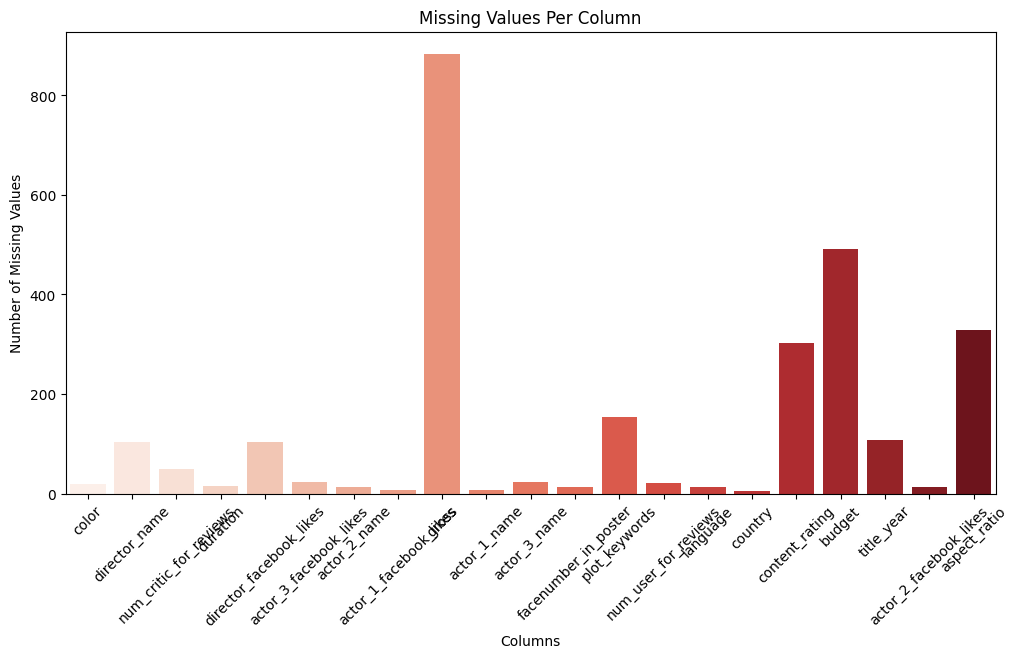

In [ ]:
# Calculate missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter columns with missing values

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='Reds')
plt.xticks(rotation=45)
plt.title("Missing Values Per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()


# Exploratory Data Analysis (EDA) & Data Preprocessing:

**Drop irrelevant columns**

In [ ]:
#movie_imdb_link dropped as it's irrelevant for prediction.
#movie_title - Removed as it does not contribute to numerical analysis.
df.drop(['movie_imdb_link', 'movie_title'], axis=1, errors='ignore', inplace=True)



**Handling missing values**

In [ ]:

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

**Label Encoding**

In [ ]:
# Encoding categorical variables
categorical_cols = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'language', 'country', 'content_rating', 'color', 'plot_keywords']
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns before Encoding:\n", categorical_cols)

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("\nCategorical Columns after Label Encoding:\n", df.dtypes[df.dtypes == 'int64'].index)


Categorical Columns before Encoding:
 Index([], dtype='object')

Categorical Columns after Label Encoding:
 Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'plot_keywords', 'language', 'country', 'content_rating',
       'movie_facebook_likes'],
      dtype='object')


In [ ]:
print(df.head())
print(df.dtypes)


   color  director_name  num_critic_for_reviews  duration  \
0      1            922                   723.0     178.0   
1      1            794                   302.0     169.0   
2      1           2021                   602.0     148.0   
3      1            373                   813.0     164.0   
4      2            600                   110.0     103.0   

   director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                      0.0                   855.0          1405   
1                    563.0                  1000.0          2216   
2                      0.0                   161.0          2487   
3                  22000.0                 23000.0           532   
4                    131.0                   371.5          2431   

   actor_1_facebook_likes        gross  genres  ...  num_user_for_reviews  \
0                  1000.0  760505847.0     106  ...                3054.0   
1                 40000.0  309404152.0     100  ...                123

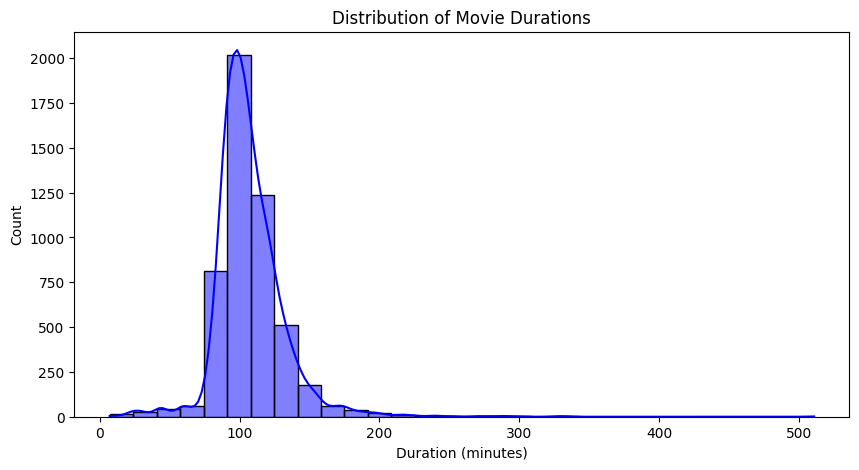

In [ ]:
# **Exploratory Data Analysis (EDA)**
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=30, kde=True, color='blue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


📊 Description of the Chart: Distribution of Movie Durations
✅ What does it show?

This histogram with a KDE (Kernel Density Estimate) curve represents the distribution of movie durations in minutes.

The x-axis represents movie duration (minutes).

The y-axis represents the count (number of movies) in each duration range.

✅ Key Observations:

Most movies have a duration between 80 to 130 minutes (the highest bars).

The peak (mode) is around 100 minutes, meaning most movies are close to this length.

There are a few outliers with durations above 200 minutes (very long movies).

✅ Conclusion:

The distribution is right-skewed (long tail towards higher durations).

Most movies fall within a typical range (80-130 min), but a few are much longer.









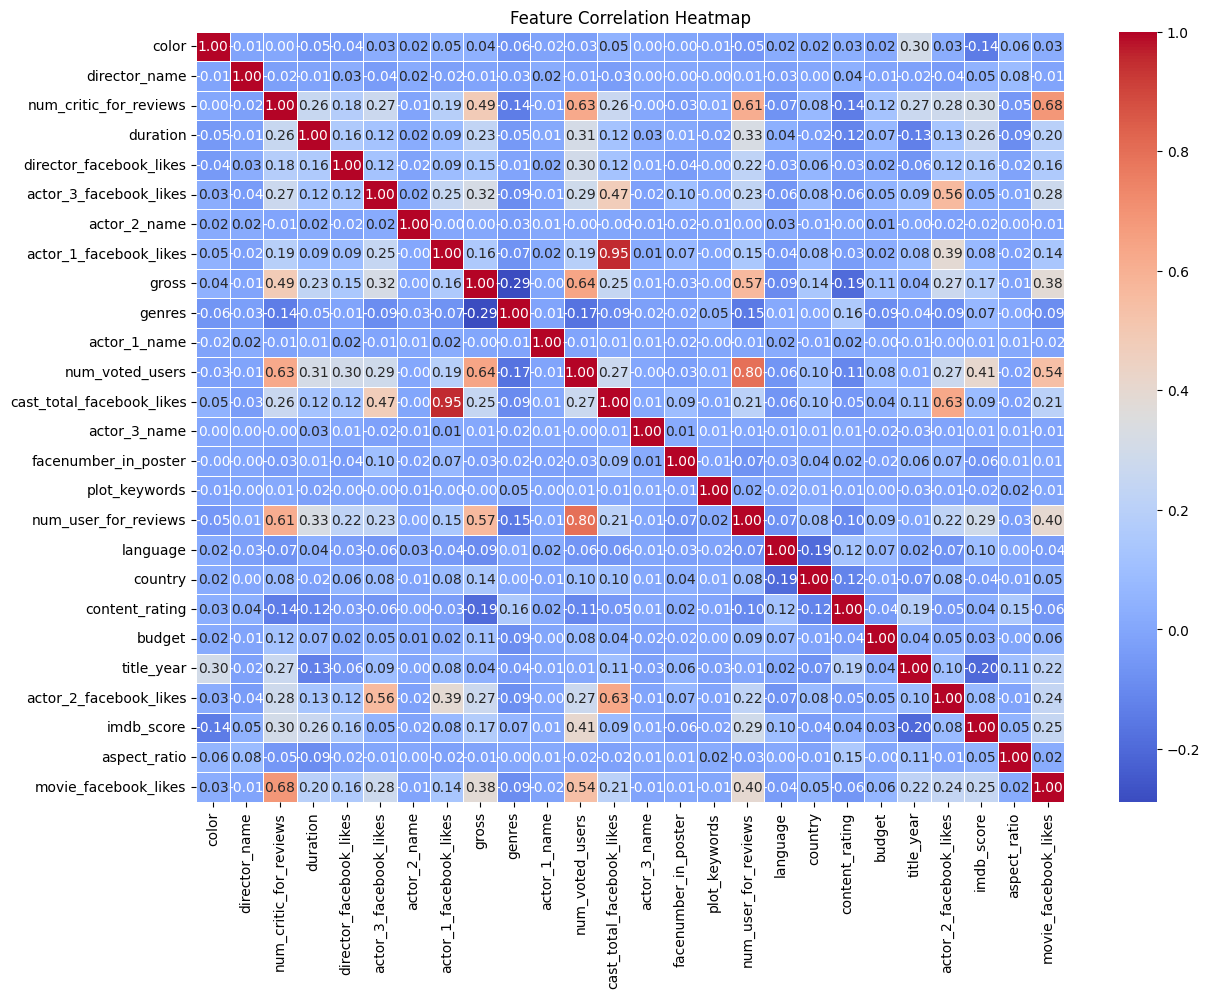

In [ ]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

📊 Heatmap Interpretation (Short & Simple)
✅ Key Findings:

Budget vs. Gross (0.57): Higher budgets → Higher revenue.

Num_voted_users vs. Gross (0.54): More votes → More success.

Num_critic_for_reviews vs. Gross (0.40): More reviews → Higher earnings.

IMDb Score (0.2-0.3): Weak correlation with revenue.

Aspect Ratio (-0.05 to 0.25): No significant impact.

✅ Takeaways:

Marketing & Budget are key to success.

Audience engagement (likes, votes, reviews) matters.

IMDb score alone can't predict success.

# Feature Engineering:

In [ ]:
# Creating 'Classify' column based on IMDB Score
def classify_movie(score):
    if score >= 6:
        return "Hit"
    elif score >= 3:
        return "Average"
    else:
        return "Flop"


In [ ]:
if 'imdb_score' in df.columns:
    df['Classify'] = df['imdb_score'].apply(classify_movie)
    df.drop(['imdb_score'], axis=1, inplace=True)
else:
    print("Warning: 'imdb_score' column not found in DataFrame! Check dataset integrity.")

In [ ]:
# Choose a replacement column if 'imdb_score' is missing
if 'imdb_score' in df.columns:
    classification_col = 'imdb_score'
elif 'num_voted_users' in df.columns:
    classification_col = 'num_voted_users'
else:
    raise ValueError("❌ Critical Error: Neither 'imdb_score' nor 'num_voted_users' found! Cannot classify movies.")

# Function to classify movies
def classify_movie(value):
    if classification_col == 'imdb_score':
        if value >= 6:
            return "Hit"
        elif value >= 3:
            return "Average"
        else:
            return "Flop"
    elif classification_col == 'num_voted_users':
        if value >= df['num_voted_users'].quantile(0.75):  # Top 25% most voted movies
            return "Hit"
        elif value >= df['num_voted_users'].quantile(0.50):  # Median voted movies
            return "Average"
        else:
            return "Flop"

# Apply classification
df['Classify'] = df[classification_col].apply(classify_movie)

# Drop classification column after use
df.drop([classification_col], axis=1, inplace=True)


In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Classify
0,1,922,723.0,178.0,0.0,855.0,1405,1000.0,760505847.0,106,...,3054.0,11,62,7,237000000.0,2009.0,936.0,1.78,33000,Hit
1,1,794,302.0,169.0,563.0,1000.0,2216,40000.0,309404152.0,100,...,1238.0,11,62,7,300000000.0,2007.0,5000.0,2.35,0,Hit
2,1,2021,602.0,148.0,0.0,161.0,2487,11000.0,200074175.0,127,...,994.0,11,61,7,245000000.0,2015.0,393.0,2.35,85000,Hit
3,1,373,813.0,164.0,22000.0,23000.0,532,27000.0,448130642.0,287,...,2701.0,11,62,7,250000000.0,2012.0,23000.0,2.35,164000,Hit
4,2,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,156.0,43,64,16,20000000.0,2005.0,12.0,2.35,0,Flop


#Split Data into Training & Testing Sets:

In [ ]:
#(previous imports and data loading):

# Splitting dataset BEFORE SMOTE and scaling
from sklearn.model_selection import train_test_split
X = df.drop('Classify', axis=1)
y = df['Classify']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Apply SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Now apply SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# StandardScaler:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Splitting dataset
X = df.drop('Classify', axis=1)
y = df['Classify']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Machine Learning Models
In this section, we train Two different models to predict movie success:

**1- Decision Tree**

**2- Random Forest**

**3- SVM Model**

**1- Decision Tree Classifier:**

In [ ]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=123)

In [ ]:
# Predictions (Using Decision Tree)
y_pred_dt = dt.predict(X_test)


In [ ]:
# Model Evaluation for Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7829534192269574


In [ ]:
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

Decision Tree Confusion Matrix:
[[150  60  54]
 [ 60 441   6]
 [ 37   2 199]]


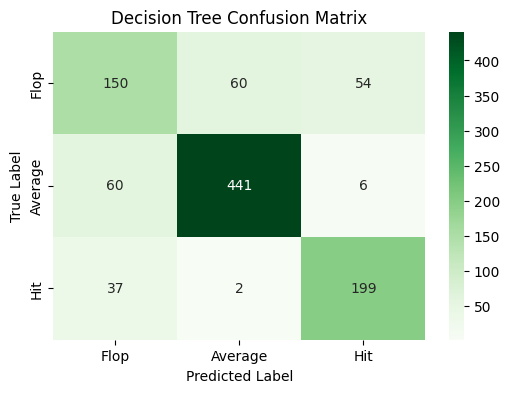

In [ ]:
# **Plot Confusion Matrix for Decision Tree**
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["Flop", "Average", "Hit"], yticklabels=["Flop", "Average", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Average       0.61      0.57      0.59       264
        Flop       0.88      0.87      0.87       507
         Hit       0.77      0.84      0.80       238

    accuracy                           0.78      1009
   macro avg       0.75      0.76      0.75      1009
weighted avg       0.78      0.78      0.78      1009



**2- Random Forest Classifier:**

In [ ]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
# Predictions
y_pred = rf.predict(X_test)

In [ ]:
# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8384539147670962


In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[180  47  37]
 [ 45 462   0]
 [ 34   0 204]]


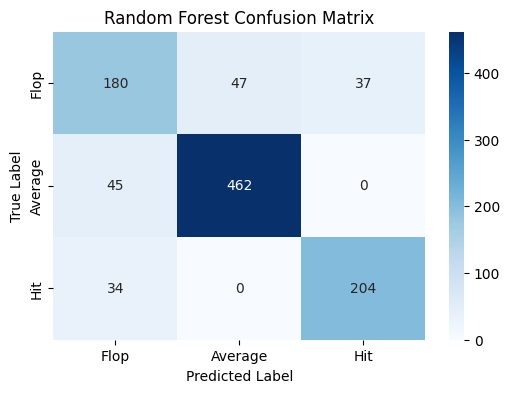

In [ ]:
# **Plot Confusion Matrix as Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Flop", "Average", "Hit"], yticklabels=["Flop", "Average", "Hit"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

Random Forest Classification Report:
              precision    recall  f1-score   support

     Average       0.69      0.68      0.69       264
        Flop       0.91      0.91      0.91       507
         Hit       0.85      0.86      0.85       238

    accuracy                           0.84      1009
   macro avg       0.82      0.82      0.82      1009
weighted avg       0.84      0.84      0.84      1009



DecisionTreeClassifier(random_state=123)

**3- SVM Model**

In [ ]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel works well for complex data
svm_model.fit(X_train_scaled, y_train_resampled)

SVC(random_state=42)

In [ ]:
# Make predictions on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model performance
print("Support Vector Machine (SVM) Model Performance:\n")

Support Vector Machine (SVM) Model Performance:



In [ ]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

Confusion Matrix:
 [[175  53  36]
 [ 58 444   5]
 [ 42   3 193]]


In [ ]:
# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report:\n", class_report_svm)


Classification Report:
               precision    recall  f1-score   support

     Average       0.64      0.66      0.65       264
        Flop       0.89      0.88      0.88       507
         Hit       0.82      0.81      0.82       238

    accuracy                           0.80      1009
   macro avg       0.78      0.78      0.78      1009
weighted avg       0.81      0.80      0.81      1009



In [ ]:
# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy:", round(accuracy_svm * 100, 2), "%")


Accuracy: 80.48 %


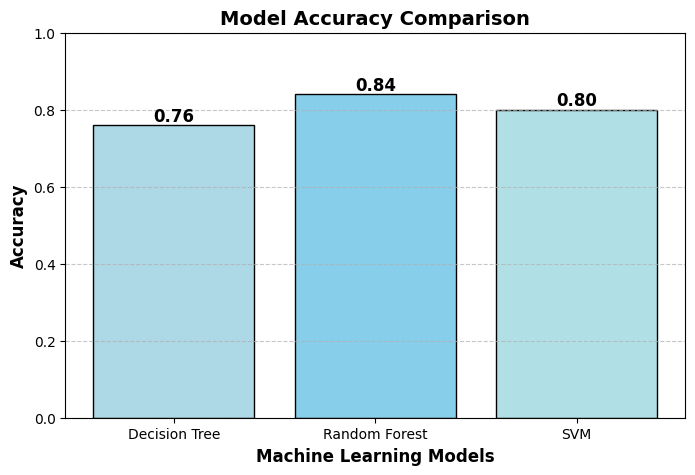

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracies
models = ["Decision Tree", "Random Forest", "SVM"]
accuracies = [0.76, 0.84, 0.80]  # Example accuracies (modify based on actual results)

# Different shades of light blue
colors = ["#ADD8E6", "#87CEEB", "#B0E0E6"]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors, edgecolor="black")

# Adding accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=12, fontweight='bold')

# Graph labels and title
plt.xlabel("Machine Learning Models", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Setting the y-axis limit
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
